# Modeling & Customer Segmentation

## Imports

In [38]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Plot style
sns.set(style="whitegrid")


## Load Dataset

In [39]:
data_path = "../notebooks/processed_data/customers_clean.csv"

# Load data
data = pd.read_csv(data_path)

print("✔️ Processed dataset loaded successfully!")
print("Shape:", data.shape)
data.head()


✔️ Processed dataset loaded successfully!
Shape: (200, 4)


,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


## Exploratory Data Analysis

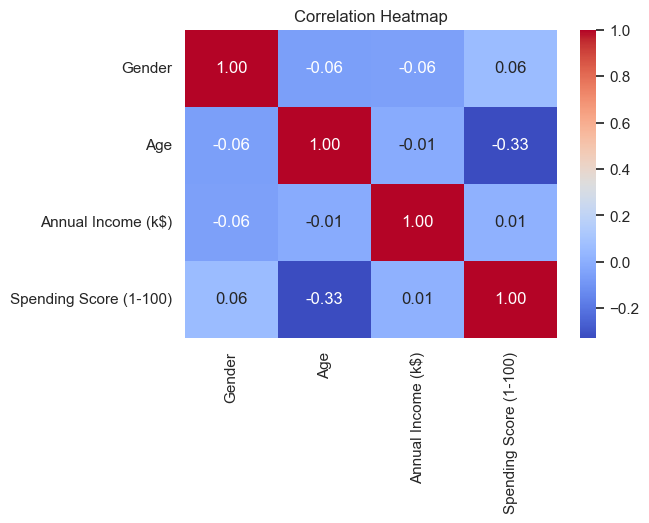

In [40]:
# --- Quick Statistics ---
data.describe()

# --- Correlation heatmap ---
plt.figure(figsize=(6,4))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


## Feature Scaling

In [41]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

print("✔️ Features scaled. Shape:", scaled_data.shape)


✔️ Features scaled. Shape: (200, 4)


## Elbow Method

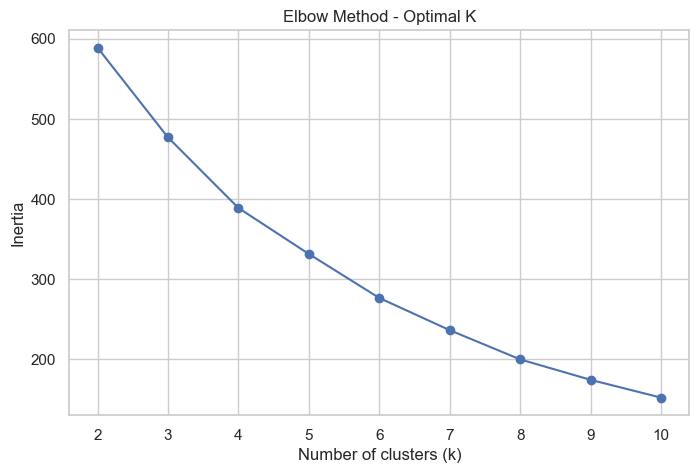

In [42]:
inertia = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot
plt.figure(figsize=(8,5))
plt.plot(K, inertia, marker="o")
plt.title("Elbow Method - Optimal K")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.show()


## Silhouette Score

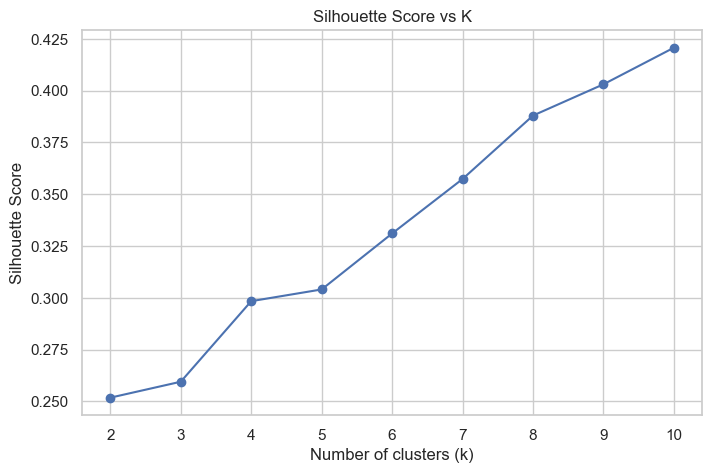

In [43]:
silhouette_scores = []

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(scaled_data)
    score = silhouette_score(scaled_data, labels)
    silhouette_scores.append(score)

# Plot
plt.figure(figsize=(8,5))
plt.plot(K, silhouette_scores, marker="o")
plt.title("Silhouette Score vs K")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.show()


## Train K-Means with Optimal Number of Clusters (k=5)

In [44]:
optimal_k = 5  # (Choose based on elbow + silhouette analysis)
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)

clusters = kmeans.fit_predict(scaled_data)

# Add cluster labels to dataset
data["Cluster"] = clusters

print("✔️ Clustering applied successfully!")
data.head()


✔️ Clustering applied successfully!


,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,0,19,15,39,3
1,0,21,15,81,3
2,1,20,16,6,3
3,1,23,16,77,3
4,1,31,17,40,3


## Cluster Visualization (2D)

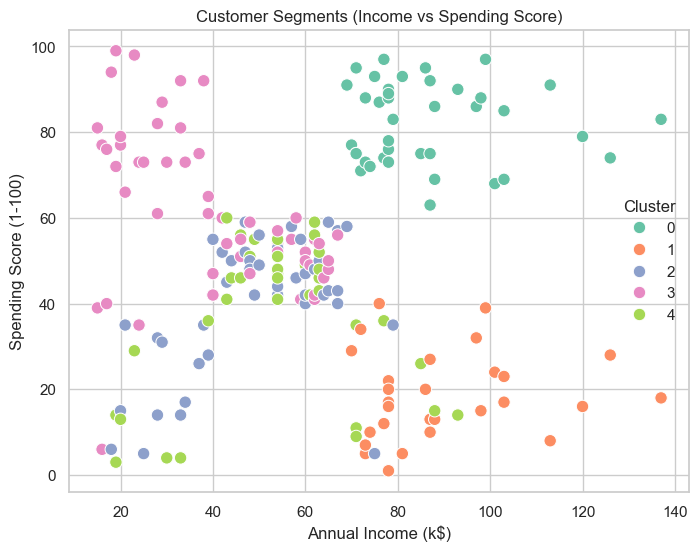

In [45]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=data["Annual Income (k$)"], 
    y=data["Spending Score (1-100)"],
    hue=data["Cluster"], 
    palette="Set2", 
    s=80
)
plt.title("Customer Segments (Income vs Spending Score)")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend(title="Cluster")
plt.show()


## Save Clustered Dataset

In [46]:
output_path = "../notebooks/processed_data/customers_segmented.csv"
data.to_csv(output_path, index=False)

print(f"✔️ Segmented dataset saved to: {output_path}")


✔️ Segmented dataset saved to: ../notebooks/processed_data/customers_segmented.csv
